In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import corrcoef
from statsmodels.stats.multitest import fdrcorrection
from statsmodels.api import GLS
from numpy import cov
from scipy.stats import spearmanr

In [2]:
import matplotlib
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}

# matplotlib.rc('font', **font)

# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42

# load data

In [3]:
species = ['human', 'mouse']

In [4]:
pairs_use = [('human', 'mouse')]

In [5]:
def common_index(a, b):
    '''
    finds the common indicies between two pandas dataframes
    
    args:
        a: a pandas dataframe  with some indecies in common w/ b
        b: a pandas dataframe with some indecies in common w/ a
    returns:
        a_prime : the dataframe a indexed by common elements with a
        b_prime : the dataframe b indexed by common elements with b
    '''
    a_prime = a.loc[a.index.isin(b.index)]
    b_prime = b.loc[a_prime.index]
    return a_prime, b_prime

# Calculate GLS

In [6]:
from scipy.stats import pearsonr

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
!ls data

human_level0_4kb_dpt_h3k27ac_counts.tsv
human_m1_level0_2kb_h3k27ac_counts.bed
human_m1_level0_2kb_h3k27me3_counts.bed
mouse_fc_human_level0_2kb_h3k27ac_counts.bed
mouse_fc_human_level0_2kb_h3k27me3_counts.bed
mouse_level0_4kb_dpt_h3k27ac_counts.tsv


In [9]:
human_ac = pd.read_csv('data/human_level0_4kb_dpt_h3k27ac_counts.tsv', sep='\t')
mouse_ac = pd.read_csv('data/mouse_level0_4kb_dpt_h3k27ac_counts.tsv', sep='\t')
human_ac = human_ac.set_index('peak').drop(['chr', 'start', 'end'], axis=1)
mouse_ac = mouse_ac.set_index('peak').drop(['chr', 'start', 'end'], axis=1)

In [10]:
human_ac.head()

,VIP,SNCG,LAMP5,SST,PVALB,ChC,L2_3_IT,L4_5_IT,L5_IT,L6_IT,L6_IT_CAR3,L5_ET,L5_6_NP,L6_CT,L6b,MGC,OPC,ODC,ASC
peak,,,,,,,,,,,,,,,,,,,
ASC_peak_529,2,0,2,0,0,3,17,7,2,5,3,2,2,1,2,0,4,6,27
VLMC_peak_183,0,1,1,2,0,0,9,6,0,2,0,0,0,5,2,0,0,3,13
ChC_peak_164,14,4,9,7,17,1,27,9,1,22,2,0,1,11,3,6,10,23,37
OPC_peak_327,2,0,6,4,6,0,14,5,2,6,2,0,0,2,4,4,0,13,22
PVALB_peak_486,0,2,2,7,2,0,2,3,1,2,2,2,1,1,12,3,5,1,17


In [11]:
mouse_ac.max(axis=0)

VIP            46
SNCG           30
LAMP5          65
SST           115
PVALB         171
ChC            23
L2_3_IT       376
L4_5_IT       282
L5_IT         165
L6_IT         140
L6_IT_CAR3      6
L5_ET         126
L5_6_NP        66
L6_CT         251
L6b            53
Endo           11
MGC           175
OPC            64
ODC           253
ASC           102
dtype: int64

In [12]:
human_ac.mean(axis=0)

VIP            8.654277
SNCG           4.155860
LAMP5          7.474856
SST            9.928372
PVALB         18.243533
ChC            1.536695
L2_3_IT       28.414867
L4_5_IT       12.346948
L5_IT          6.689012
L6_IT         12.215180
L6_IT_CAR3     2.635357
L5_ET          0.789880
L5_6_NP        2.361949
L6_CT          9.507093
L6b            6.105304
MGC           10.877201
OPC           14.828983
ODC           26.040913
ASC           44.006895
dtype: float64

In [13]:
human_ac.max(axis=0)

VIP           164
SNCG           77
LAMP5         149
SST           176
PVALB         334
ChC            37
L2_3_IT       529
L4_5_IT       233
L5_IT         136
L6_IT         211
L6_IT_CAR3     55
L5_ET          19
L5_6_NP        48
L6_CT         153
L6b           111
MGC           305
OPC           293
ODC           784
ASC           958
dtype: int64

In [14]:
mouse_ac.mean(axis=0)

VIP            2.904553
SNCG           1.541067
LAMP5          3.074263
SST            8.133027
PVALB          7.946360
ChC            0.762943
L2_3_IT       19.582810
L4_5_IT       14.285495
L5_IT          9.888186
L6_IT          8.143250
L6_IT_CAR3     0.026483
L5_ET          7.291190
L5_6_NP        3.710259
L6_CT         14.223896
L6b            3.396958
Endo           0.233573
MGC            2.229035
OPC            2.810664
ODC            9.100195
ASC            2.593229
dtype: float64

In [15]:
(human_ac > 2).sum(axis=0)

VIP           116528
SNCG           83176
LAMP5         108703
SST           123952
PVALB         144277
ChC            41490
L2_3_IT       161588
L4_5_IT       135316
L5_IT         110389
L6_IT         133078
L6_IT_CAR3     64174
L5_ET          21088
L5_6_NP        60252
L6_CT         121844
L6b           108712
MGC            94673
OPC           124522
ODC           115880
ASC           154452
dtype: int64

In [16]:
(mouse_ac > 4).sum(axis=0)

VIP            44641
SNCG           19834
LAMP5          47690
SST           107452
PVALB          97828
ChC             4569
L2_3_IT       144548
L4_5_IT       128165
L5_IT         113724
L6_IT          99736
L6_IT_CAR3         3
L5_ET          99610
L5_6_NP        55397
L6_CT         129581
L6b            52533
Endo             572
MGC            27746
OPC            39959
ODC            88730
ASC            32897
dtype: int64

In [17]:
h_use = (human_ac > 4).sum(axis=0) > 25000

In [18]:
m_use = (mouse_ac > 4).sum(axis=0) > 25000

In [1]:
h_use

NameError: name 'h_use' is not defined

In [19]:
h_use = h_use.index[h_use]

In [20]:
m_use = m_use.index[m_use]

In [21]:
cells = np.intersect1d(h_use, m_use)

In [22]:
cells

array(['ASC', 'L2_3_IT', 'L4_5_IT', 'L5_6_NP', 'L5_IT', 'L6_CT', 'L6_IT',
       'L6b', 'LAMP5', 'MGC', 'ODC', 'OPC', 'PVALB', 'SST', 'VIP'],
      dtype=object)

In [23]:
mouse_ac.index

Index(['ASC_peak_529', 'VLMC_peak_183', 'ChC_peak_164', 'OPC_peak_327',
       'PVALB_peak_486', 'VLMC_peak_185', 'MGC_peak_251', 'Endo_peak_143',
       'VLMC_peak_189a', 'SNCG_peak_273b',
       ...
       'SNCG_peak_58232', 'MGC_peak_65971', 'Endo_peak_28709',
       'Endo_peak_28710', 'VLMC_peak_44225', 'Endo_peak_28716c',
       'VLMC_peak_44228', 'L6b_peak_89626b', 'MGC_peak_66016',
       'ChC_peak_40200'],
      dtype='object', name='peak', length=204921)

In [24]:
test_regions = np.intersect1d(human_ac.index[(human_ac[cells].max(axis=1) > 4)], mouse_ac.index[(mouse_ac[cells].max(axis=1) > 4)])

In [25]:
test_regions

array(['ASC_peak_10000b', 'ASC_peak_10001b', 'ASC_peak_10003', ...,
       'VLMC_peak_9990', 'VLMC_peak_9993', 'VLMC_peak_9997'], dtype=object)

In [26]:
len(test_regions)

169548

In [27]:
x = human_ac.loc[test_regions, cells]

In [28]:
x.sum(axis=0)

ASC        8758871
L2_3_IT    5667181
L4_5_IT    2455753
L5_6_NP     469669
L5_IT      1328415
L6_CT      1891238
L6_IT      2429747
L6b        1208024
LAMP5      1487120
MGC        2165825
ODC        5200454
OPC        2943706
PVALB      3636931
SST        1974139
VIP        1718668
dtype: int64

In [29]:
x = mouse_ac.loc[test_regions, cells]

In [30]:
x.sum(axis=0)

ASC         516211
L2_3_IT    3875607
L4_5_IT    2821953
L5_6_NP     731915
L5_IT      1946729
L6_CT      2811094
L6_IT      1606327
L6b         663846
LAMP5       604691
MGC         433085
ODC        1796193
OPC         548841
PVALB      1572675
SST        1598960
VIP         568029
dtype: int64

In [31]:
x/x.sum(axis=0)

,ASC,L2_3_IT,L4_5_IT,L5_6_NP,L5_IT,L6_CT,L6_IT,L6b,LAMP5,MGC,ODC,OPC,PVALB,SST,VIP
peak,,,,,,,,,,,,,,,
ASC_peak_10000b,0.000017,4.128386e-06,2.126187e-06,0.000003,0.000002,2.134400e-06,0.000004,0.000005,0.000000,0.000012,0.000004,0.000002,3.815156e-06,4.377846e-06,0.000000
ASC_peak_10001b,0.000012,2.064193e-06,3.543645e-07,0.000000,0.000003,3.201601e-06,0.000001,0.000002,0.000002,0.000018,0.000005,0.000002,1.907578e-06,5.003252e-06,0.000004
ASC_peak_10003,0.000000,1.032096e-06,3.543645e-07,0.000000,0.000000,2.490134e-06,0.000000,0.000003,0.000002,0.000000,0.000004,0.000000,6.358593e-07,0.000000e+00,0.000000
ASC_peak_10006,0.000008,1.496540e-05,2.126187e-06,0.000000,0.000005,6.403201e-06,0.000012,0.000006,0.000002,0.000007,0.000003,0.000004,3.815156e-06,3.752439e-06,0.000002
ASC_peak_10015,0.000014,1.032096e-06,1.063094e-06,0.000000,0.000001,3.557334e-07,0.000002,0.000000,0.000000,0.000014,0.000004,0.000004,2.543437e-06,1.876220e-06,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VLMC_peak_9989a,0.000010,3.870361e-06,5.315468e-06,0.000004,0.000006,4.268801e-06,0.000005,0.000003,0.000005,0.000007,0.000006,0.000005,6.994452e-06,6.879472e-06,0.000004
VLMC_peak_999,0.000002,6.966651e-06,6.732926e-06,0.000010,0.000005,8.537601e-06,0.000007,0.000020,0.000023,0.000000,0.000036,0.000009,5.722734e-06,1.375894e-05,0.000007
VLMC_peak_9990,0.000000,7.740723e-07,1.771823e-06,0.000000,0.000002,2.134400e-06,0.000001,0.000005,0.000002,0.000002,0.000002,0.000002,2.543437e-06,6.254065e-07,0.000000


In [32]:
x = (x*1e6)/(x.sum(axis=0))

In [33]:
x = np.log2(x+1)

In [34]:
# for orgin in species:
#     path_use = path.format(orgin) + tail
#     clust_measures = {specie : pd.read_csv(path_use.format(specie),
#                                         sep = '\t').set_index('human') for specie in species}
#     out_dir = '../../data/outputs/atac_gls_results/experimental/{}_origin/log2cpm/'.format(orgin)
#     !mkdir -p $out_dir
#     for pair in pairs_use:
spec1, spec2 = ['human', 'mouse']
df1 = human_ac.loc[test_regions, cells]
df2 = mouse_ac.loc[test_regions, cells]
df1 = np.log2((df1*1e6)/df1.sum(axis=0) +1)
df2 = np.log2((df2*1e6)/df2.sum(axis=0) +1)
df1_ids = df1.loc[((df1 > 1).sum(axis=1) > 1) & ((df2 > 0).sum(axis=1) > 1)].index.values
df2_ids = df2.loc[((df2 > 1).sum(axis=1) > 1) & ((df1 > 0).sum(axis=1) > 1)].index.values
use_ids = np.unique(np.concatenate([df1_ids, df2_ids]))
df1 = df1.loc[use_ids]
df2 = df2.loc[use_ids]
df1, df2 = common_index(df1, df2)
print(df1.shape, df2.shape)

# n_neighbors.fit(df1.values)
cov_use = cov(df1.values.T)
n_gene = df1.shape[0]
r_square = [None] * n_gene
param = [None] * n_gene
p_vals = [None] * n_gene
t_vals = [None] * n_gene
corr = [None] * n_gene
corr_p = [None] * n_gene
pear_corr =[None] * n_gene
pear_p = [None] * n_gene
for idx in range(n_gene):
    model = GLS(df1.iloc[idx].values, df2.iloc[idx].values, sigma=cov_use)
    res = model.fit()
    r_square[idx] = res.rsquared
    p_vals[idx] = res.pvalues[0]
    param[idx] = res.params[0]
    t_vals[idx] = res.t_test([1]).tvalue[0][0]
    # compare to correlation
    corr_, corr_p_ = spearmanr(df1.iloc[idx].values, df2.iloc[idx].values)
    corr[idx] = corr_
    corr_p[idx] = corr_p_ 
    pear_c, pear_p_ = pearsonr(df1.iloc[idx].values, df2.iloc[idx].values)
    pear_corr[idx] = pear_c
    pear_p[idx] = pear_p_
p_vals = np.nan_to_num(np.array(p_vals), nan=1)
sig, fdr = fdrcorrection(p_vals, alpha=.05, method='n')
sig_corr, fdr_corr = fdrcorrection(corr_p, alpha=.05, method='n')
sig_pearson, fdr_pear = fdrcorrection(pear_p, alpha=.05, method='n')

print(np.sum(fdr < .05), spec1, spec2)
print(sig_corr.sum())
df_res = pd.DataFrame(np.array([r_square, param, p_vals, t_vals, fdr, corr, fdr_corr, pear_corr, fdr_pear]).T,
                    index=df1.index,
                    columns=['r_square', 'coeff', 'p_val', 't_val', 'fdr', 'corr', 'fdr_corr', 'pear_corr', 'fdr_pear'])
print('/gls_{}_{}.tsv'.format(spec1, spec2), df_res.shape)

(169486, 15) (169486, 15)
814 human mouse
92
/gls_human_mouse.tsv (169486, 9)


In [35]:
df_res.to_csv('h3k27ac_dp_gls_strict_threshold_{}_{}.tsv'.format(spec1, spec2), sep='\t')

In [36]:
df_res.head()

,r_square,coeff,p_val,t_val,fdr,corr,fdr_corr,pear_corr,fdr_pear
peak,,,,,,,,,
ASC_peak_10000b,0.439942,0.617604,0.005095,3.316233,0.804065,0.407507,1.0,0.496416,1.000000
ASC_peak_10001b,0.213172,0.419517,0.071810,1.947551,1.000000,0.510714,1.0,0.619112,1.000000
ASC_peak_10003,0.008662,0.056556,0.731734,0.349746,1.000000,-0.007748,1.0,-0.002022,1.000000
ASC_peak_10006,0.061827,0.296947,0.353085,0.960530,1.000000,0.064343,1.0,0.093514,1.000000
ASC_peak_10015,0.535962,0.793789,0.001263,4.021186,0.389288,0.658238,1.0,0.829625,0.127106


In [3]:
check = pd.read_csv('h3k27ac_dp_gls_strict_threshold_{}_{}.tsv'.format('human', 'mouse'), sep='\t')

In [4]:
check.head()

,peak,r_square,coeff,p_val,t_val,fdr,corr,fdr_corr,pear_corr,fdr_pear
0,ASC_peak_10000b,0.439942,0.617604,0.005095,3.316233,0.804065,0.407507,1.0,0.496416,1.000000
1,ASC_peak_10001b,0.213172,0.419517,0.071810,1.947551,1.000000,0.510714,1.0,0.619112,1.000000
2,ASC_peak_10003,0.008662,0.056556,0.731734,0.349746,1.000000,-0.007748,1.0,-0.002022,1.000000
3,ASC_peak_10006,0.061827,0.296947,0.353085,0.960530,1.000000,0.064343,1.0,0.093514,1.000000
4,ASC_peak_10015,0.535962,0.793789,0.001263,4.021186,0.389288,0.658238,1.0,0.829625,0.127106


In [7]:
out_str = ''.join([i + '\n' for i in check.loc[check.fdr < .05].peak])

In [9]:
open('level3_k27ac_peaks.txt', 'w').write(out_str)

13579

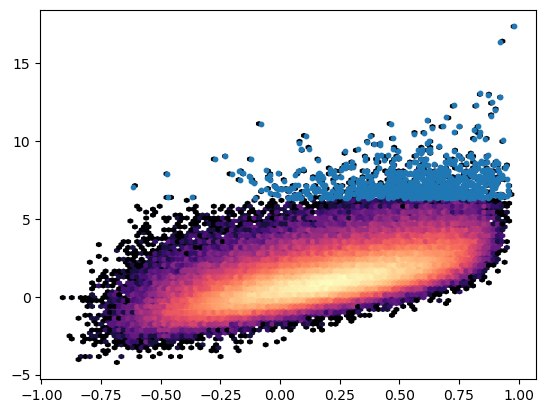

In [37]:
plt.hexbin(df_res['corr'].values, df_res.t_val.values, cmap='magma', bins='log')
plt.scatter(df_res.loc[df_res.fdr<.05, 'corr'], df_res.loc[df_res.fdr< .05, 't_val'], s=10)

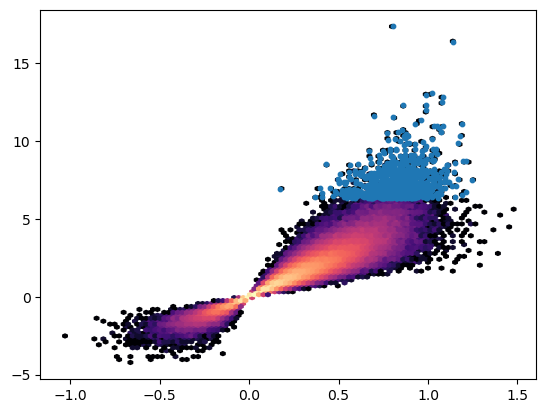

In [38]:
plt.hexbin(df_res['coeff'].values, df_res.t_val.values, cmap='magma', bins='log')
plt.scatter(df_res.loc[df_res.fdr<.05, 'coeff'], df_res.loc[df_res.fdr< .05, 't_val'], s=10)

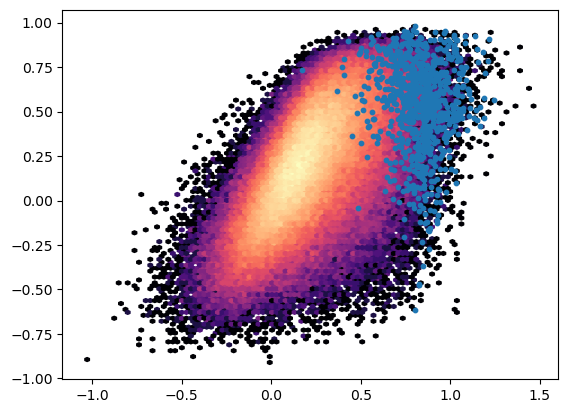

In [39]:
plt.hexbin(df_res['coeff'].values, df_res['corr'].values, cmap='magma', bins='log')
plt.scatter(df_res.loc[df_res.fdr<.05, 'coeff'], df_res.loc[df_res.fdr< .05, 'corr'], s=10)

In [40]:
np.sum(df_res.fdr_corr < .1)

262

In [41]:
np.sum(df_res['fdr'] < .05)

814